# LABORATORIUM 2 -  Intro to stan
## Bartosz Więcek

In [6]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='/home/code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [4]:
samples

CmdStanMCMC: model=code_1 chains=1['method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 csv_files:
	/tmp/tmpcmrs2p35/code_1-20230321165128.csv
 output_files:
	/tmp/tmpcmrs2p35/code_1-20230321165128_0-stdout.txt

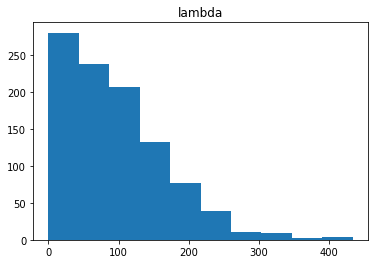

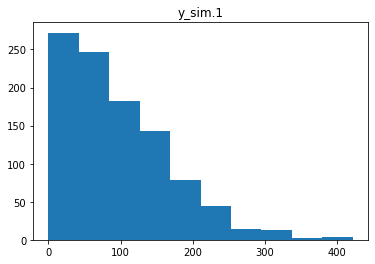

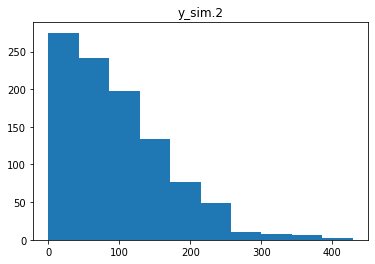

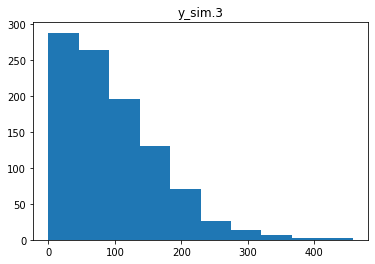

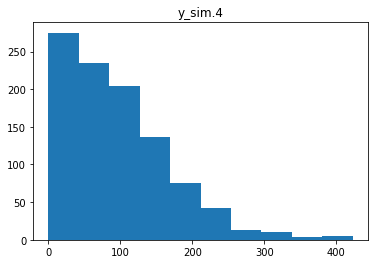

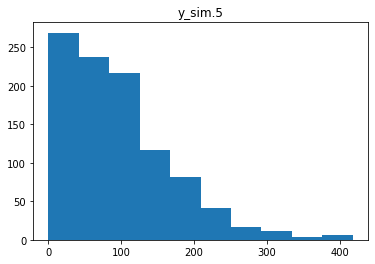

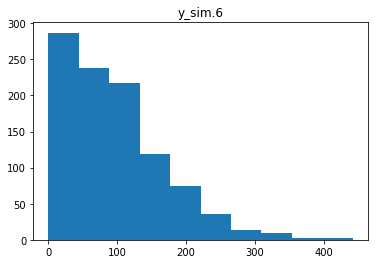

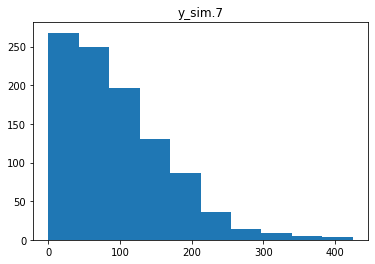

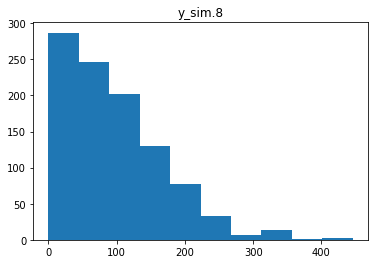

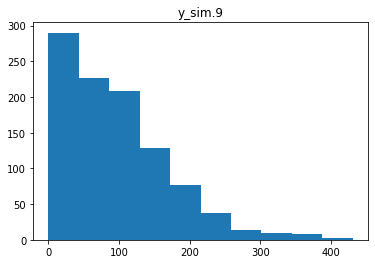

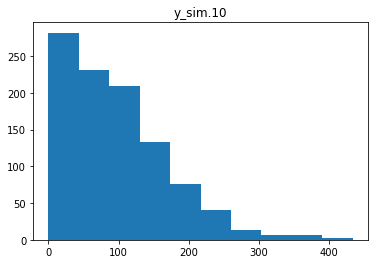

In [19]:
df_1 = pd.read_csv('/tmp/tmpcmrs2p35/code_1-20230321165128.csv', skiprows=37, nrows=1000)

for col_name in list(df_1.columns)[2:]:
    plt.hist(df_1[col_name])
    plt.title(col_name)
    plt.show()

## Excercise 2 - Constraints on the data 

In [20]:
bern1 = CmdStanModel(stan_file='/home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /home/code_2.stan to exe file /home/code_2
INFO:cmdstanpy:compiled model executable: /home/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_2.hpp /home/code_2.stan
Warning in '/home/code_2.stan', line 3, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn


INFO:cmdstanpy:CmdStan done processing.


In [21]:
bern2 = CmdStanModel(stan_file='/home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /home/code_3.stan to exe file /home/code_3
INFO:cmdstanpy:compiled model executable: /home/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_3.hpp /home/code_3.stan
Warning in '/home/code_3.stan', line 3, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn


INFO:cmdstanpy:CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [22]:
model_gm1 = CmdStanModel(stan_file='/home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Iteration:  100 / 7000 [  1%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230321170329_1.csv, /samples/code_4-20230321170329_2.csv, /samples/code_4-20230321170329_3.csv, /samples/code_4-20230321170329_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

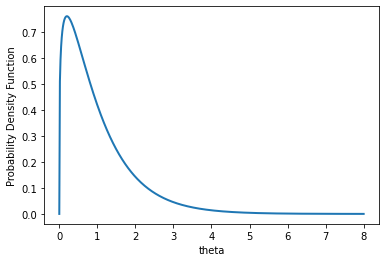

In [23]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [24]:
model_gm2 = CmdStanModel(stan_file='/home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█████▎    | 00:00 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230321170330_1.csv, /samples/code_5-20230321170330_2.csv, /samples/code_5-20230321170330_3.csv, /samples/code_5-20230321170330_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

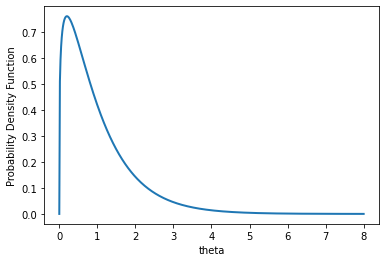

In [25]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [26]:
model_tune = CmdStanModel(stan_file='/home/code_6.stan')

F = 7
L = 6
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [27]:
tunes

CmdStanMCMC: model=code_6 chains=1['method=sample', 'num_samples=1', 'num_warmup=0', 'algorithm=fixed_param']
 csv_files:
	/tmp/tmpcmrs2p35/code_6-20230321170402.csv
 output_files:
	/tmp/tmpcmrs2p35/code_6-20230321170402_0-stdout.txt

In [34]:
df_4 = pd.read_csv('/tmp/tmpcmrs2p35/code_6-20230321170402.csv', skiprows=37, nrows=1)

print(f"Standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than ({F}+{L})/2 is equal to {df_4['sigma'][0]}.")

Standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (7+6)/2 is equal to 2.52346.


## Excercise 5 - different methods of defining models


In [36]:
model_samp_st = CmdStanModel(stan_file='/home/code_7.stan')
model_log_target = CmdStanModel(stan_file='/home/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='/home/code_9.stan')
data = {'N': F}
seed = 24102000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.


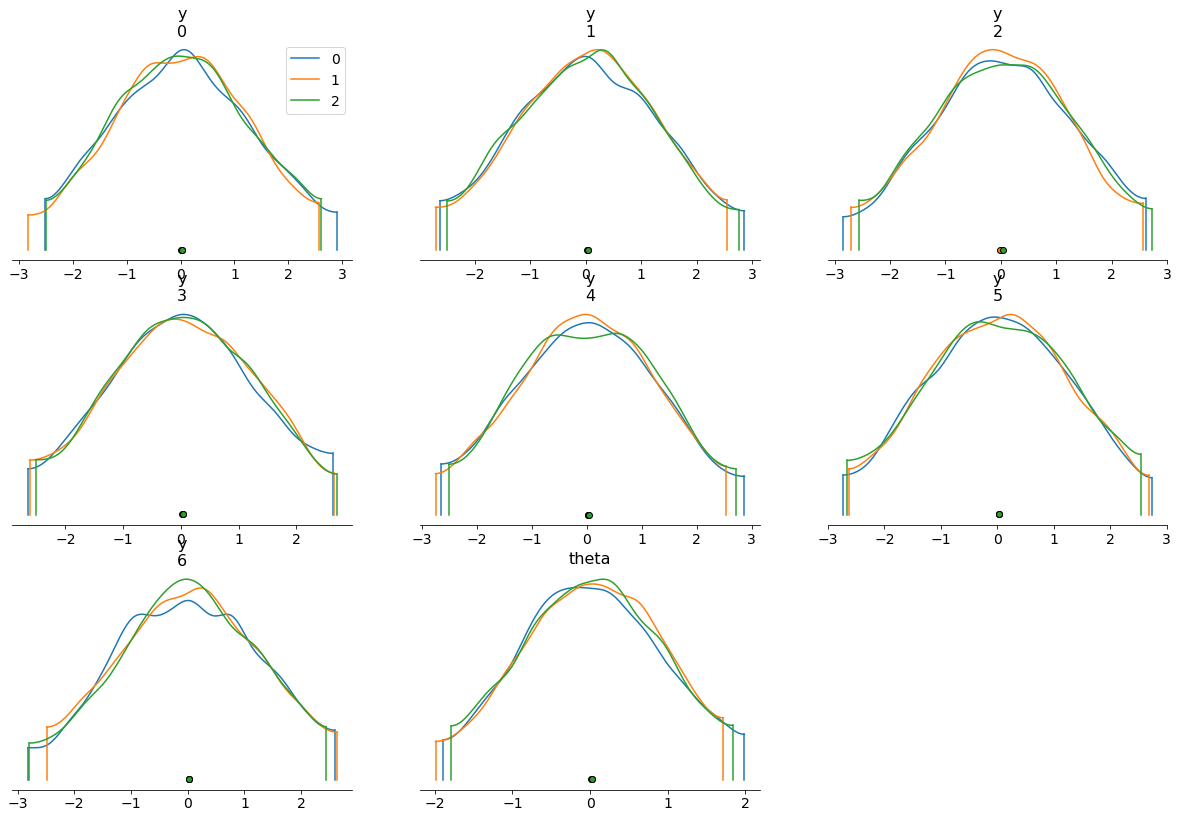

In [37]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [40]:
model_gq = CmdStanModel(stan_file='/home/code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result_1)
# investigate the output and plot histogram of mean_y variable

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing


In [41]:
mean_of_y

CmdStanGQ: model=code_10 chains=4['method=generate_quantities', 'fitted_params=/tmp/tmpcmrs2p35/code_7-20230321171453_1.csv']
 csv_files:
	/tmp/tmpcmrs2p35/code_10-20230321171709_1.csv
	/tmp/tmpcmrs2p35/code_10-20230321171709_2.csv
	/tmp/tmpcmrs2p35/code_10-20230321171709_3.csv
	/tmp/tmpcmrs2p35/code_10-20230321171709_4.csv
 output_files:
	/tmp/tmpcmrs2p35/code_10-20230321171709_0-stdout.txt
	/tmp/tmpcmrs2p35/code_10-20230321171709_1-stdout.txt
	/tmp/tmpcmrs2p35/code_10-20230321171709_2-stdout.txt
	/tmp/tmpcmrs2p35/code_10-20230321171709_3-stdout.txt

In [42]:
import csv

mean_of_y_data_from_csv = []

for j in range(1, 5):
    with open(f'/tmp/tmpvl3x2l0c/code_10-20230316152352_{j}.csv') as csv_in:
        i = 0
        mean_of_y_data = []
        for row in csv.reader(csv_in):
            if i >= 24:
                mean_of_y_data.append(float(row[0]))
            
            i += 1

    mean_of_y_data_from_csv.append(mean_of_y_data[:])

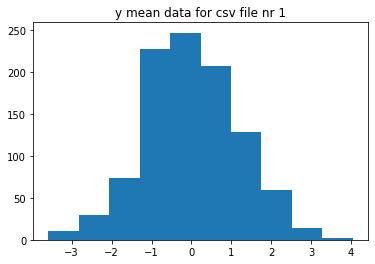

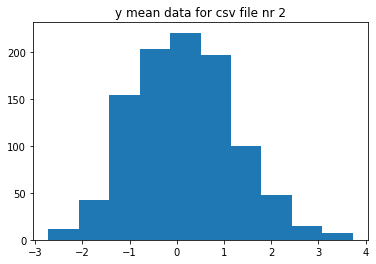

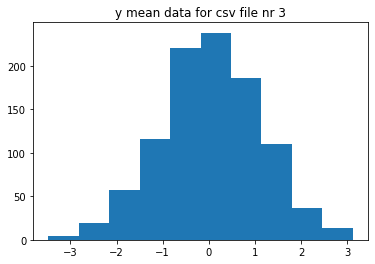

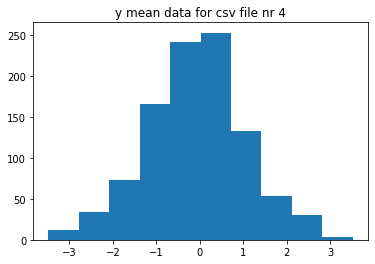

In [43]:
for csv_nr, mean_of_y_data_hist in enumerate(mean_of_y_data_from_csv):
    plt.hist(mean_of_y_data_hist)
    plt.title(f'y mean data for csv file nr {csv_nr + 1}')
    plt.show()